### Convert and Transform Data

This notebook features conversion and transformation of data from [Pew Research Center](http://www.pewresearch.org/) about social issue.  
The data has been cleaned and converted to a more usable form.  
Different hypotheses are formed which are supported through plots and readings  
Libraries used
1. dplyr
2. ggplot2

In [1]:
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
data <- read.csv(file="June 10-July 12, 2015 - Gaming, Jobs and Broadband/June 10-July 12, 2015 - Gaming, Jobs and Broadband - CSV.csv")

### Data Conversion

The following fields have been converted to a more understandable form for plots.    
* **eminuse** - Internet Use
    - 0 - Yes
    - 1 - No
    - 2 - Refused    
    

In [3]:
data <- within(data, eminuse <- factor(eminuse, labels = c("Yes", "No", "Refused")))

* **intmob** - Mobile Internet Use
    - 0 - Yes
    - 1 - No
    - 2 - Refused  

In [4]:
data <- within(data, intmob <- factor(intmob, labels = c("Yes", "No", "Refused")))

* **date1a** - Dating App Use
    - 0 - Yes
    - 1 - No
    - 2 - Dont Know
    - 3 - Refused  


In [5]:
data <- within(data, date1a <- factor(date1a, labels = c("Yes", "No", "Dont Know", "Refused")))

* **sex** - Gender
    - 0 - Male
    - 1 - Female   


In [6]:
data <- within(data, sex <- factor(sex, labels = c("Male", "Female")))

* **age** = Age  
  Age has been converted from numeric values to bins of 10 years to form age groups
    - 18-20 = 18+
    - 20-30 = 20+
    - 30-40 = 30+
    - 40-50 = 40+
    - 50-60 = 50+
    - 60-70 = 60+
    - 70-80 = 70+
    - 80-90 = 80+
    - \> 90 = 90+


In [7]:
data$age = findInterval(data$age, c(10, 20, 30, 40, 50, 60, 70, 80 ,90))
data <- within(data, age <- factor(age, labels = c("18+", "20+", "30+", "40+", "50+", "60+", "70+", "80+", "90+")))

* **marital** - marital status
    - 0 - Msrried
    - 1 - Living with Partner
    - 2 - Divorced
    - 3 - Separated
    - 4 - Widowed
    - 5 - Single
    - 6 - Dont Know
    - 7 - Refused

In [8]:
data <- within(data, marital <- factor(marital, labels = c("Married", "Living with Partner", "Divorced", "Separated", "Widowed", "Single", "Dont Know", "Refused")))

* **educ2** - Highest Level of Education Completed
    - 0 - Less than High School
    - 1 - High School Incomplete
    - 2 - High School Graduate
    - 3 - Some College, No Degree
    - 4 - Two Year Associate Degree
    - 5 - Four Year College
    - 6 - Some Postgraduate Degree
    - 7 - Professional Postgraduate Degree
    - 8 - Dont Know
    - 9 - Refused

In [9]:
data <- within(data, educ2 <- factor(educ2, labels = c("Less than High School", "High School Incomplete", "High School Graduate", "Some College, No Degree", "Two Year Associate Degree", "Four Year College","Some Postgraduate Degree", "Professional Postgraduate Degree", "Dont Know", "Refused")))

* **inc** - Income

    - 0 - <10K
    - 1 - 10K
    - 2 - 20K
    - 3 - 30K
    - 4 - 40K
    - 5 - 50K
    - 6 - 75K
    - 7 - 100K
    - 8 - 150K
    - 9 - Dont Know
    - 10 - Refused

In [10]:
data <- within(data, inc <- factor(inc, labels = c("< 10K", "10K+", "20K+","30K+", "40K+", "50K+", "75K+", "100K+", "150K+", "Dont Know", "Refused")))

### Preview of the Cleaned and Converted Data

In [11]:
data %>% select(psraid, eminuse, intmob, date1a, sex, age, marital, educ2, inc)

psraid,eminuse,intmob,date1a,sex,age,marital,educ2,inc
100006,Yes,Yes,No,Female,40+,Married,Four Year College,Refused
100009,Yes,Yes,No,Female,60+,Married,"Some College, No Degree",50K+
100011,No,No,NA,Female,80+,Widowed,Less than High School,20K+
100039,Yes,Yes,No,Female,40+,Married,Two Year Associate Degree,50K+
100040,Yes,No,No,Female,60+,Refused,"Some College, No Degree",20K+
100043,Yes,Yes,No,Female,60+,Married,Four Year College,100K+
100049,No,No,NA,Male,70+,Married,Four Year College,Refused
100051,No,No,NA,Male,70+,Married,"Some College, No Degree",75K+
100058,Yes,Yes,No,Male,70+,Widowed,Four Year College,50K+
100059,No,No,NA,Male,70+,Married,High School Graduate,20K+


### Distribution of People By Age Groups

In [12]:
data %>% group_by(age) %>% summarize(num_people = n())

age,num_people
18+,50
20+,275
30+,258
40+,268
50+,370
60+,405
70+,216
80+,105
90+,54


### Distribution of People by Sex According to Internet Use and Mobile Internet Use

It is seen that both Male and Female have approximately same number of people who use Internet and Mobile Internet

sex,eminuse,intmob,num_people
Male,Yes,Yes,696
Male,Yes,No,127
Female,Yes,Yes,717
Female,Yes,No,129


sex,num_people
Male,823
Female,846


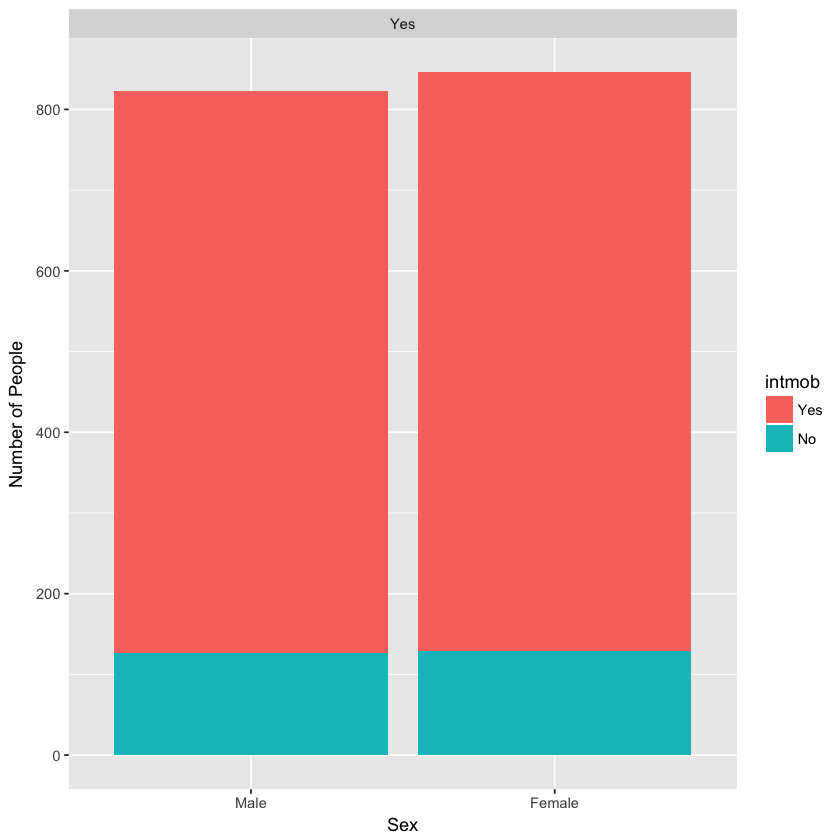

In [13]:
plot1_data <- data %>% filter(eminuse == "Yes", intmob != "Refused")
plot1_data %>% group_by(sex,eminuse,intmob) %>% summarise(num_people = n())
plot1_data %>% group_by(sex) %>% summarise(num_people = n())

# qplot(sex, eminuse, colour = intfreq, data=plot1_data, geom="jitter")
qplot(sex, data=plot1_data, geom="bar", facets = . ~ eminuse, fill=intmob, xlab = "Sex", ylab = "Number of People")

### Distribution of People by Sex according to Dating App Use [ Internet Use or Mobile Internet Use was Yes]

It is seen that dating app usage among males is ~20% higher compared to females

sex,Mobile_Internet,Dating_App_Used,num_people
Male,Yes,Yes,109
Female,Yes,Yes,92


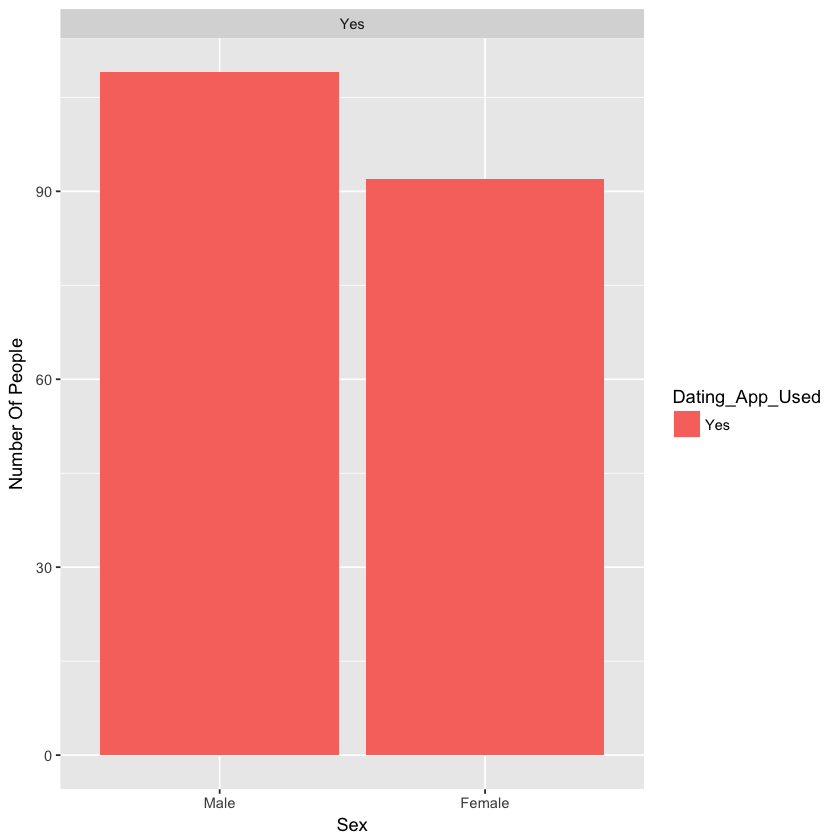

In [14]:
plot2_data <- data %>% filter(intmob == "Yes", date1a == "Yes") %>% select(sex,"Mobile_Internet"=intmob, "Dating_App_Used"=date1a)
plot2_data %>% group_by(sex,Mobile_Internet,Dating_App_Used) %>% summarize(num_people = n())
qplot(sex, data=plot2_data, geom="bar", facets = . ~ Mobile_Internet, fill=Dating_App_Used, xlab = "Sex", ylab = "Number Of People")

### Distribution of People by Sex and Age Group based on Dating App Use

It is seen that while more males in 20s used dating app compared to females, females in 30s used dating apps more compared to 30s males.

sex,date1a,age,num_people
Male,Yes,18+,4
Male,Yes,20+,36
Male,Yes,30+,18
Male,Yes,40+,24
Male,Yes,50+,20
Male,Yes,60+,19
Male,Yes,70+,1
Male,Yes,80+,1
Male,Yes,90+,1
Female,Yes,18+,2


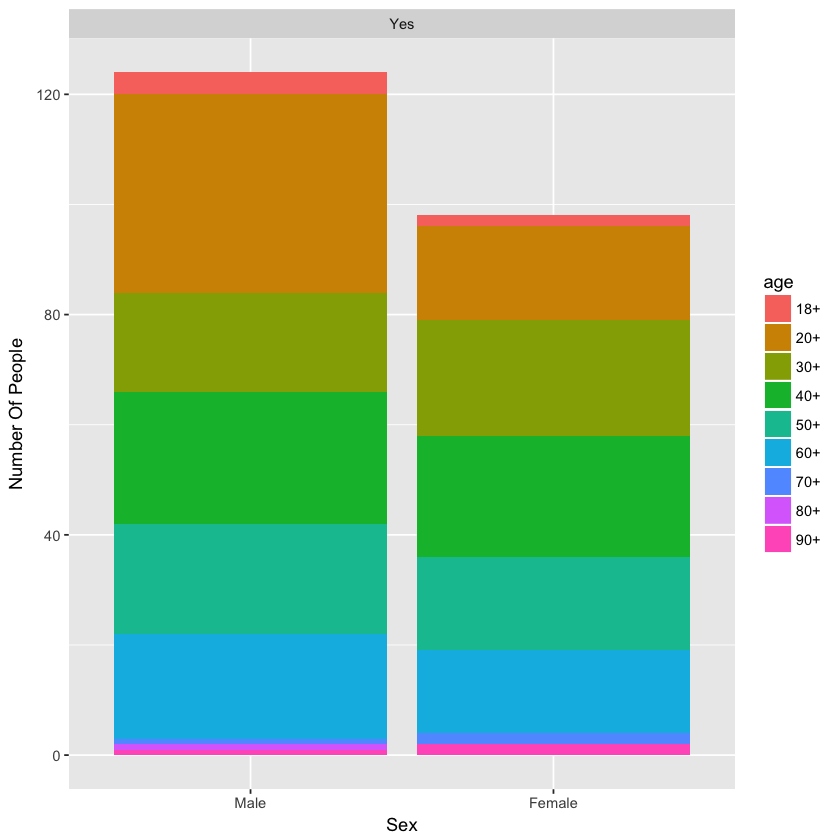

In [15]:
plot3_data <- data %>% filter(eminuse == "Yes", date1a == "Yes")
plot3_data %>% group_by(sex,date1a,age) %>% summarize(num_people = n())
qplot(sex, data=plot3_data, geom="bar", facets = . ~ date1a, fill=age, xlab = "Sex", ylab = "Number Of People")

### Distribution of People by Age and Marital Status based on the Dating App Use

It is seen that while the number of people using dating app is highest for single people in both genders, the numbers are significant for married and divorced as well.

sex,date1a,marital,num_people
Male,Yes,Married,29
Male,Yes,Living with Partner,10
Male,Yes,Divorced,19
Male,Yes,Separated,5
Male,Yes,Widowed,2
Male,Yes,Single,56
Female,Yes,Married,23
Female,Yes,Living with Partner,10
Female,Yes,Divorced,21
Female,Yes,Separated,7


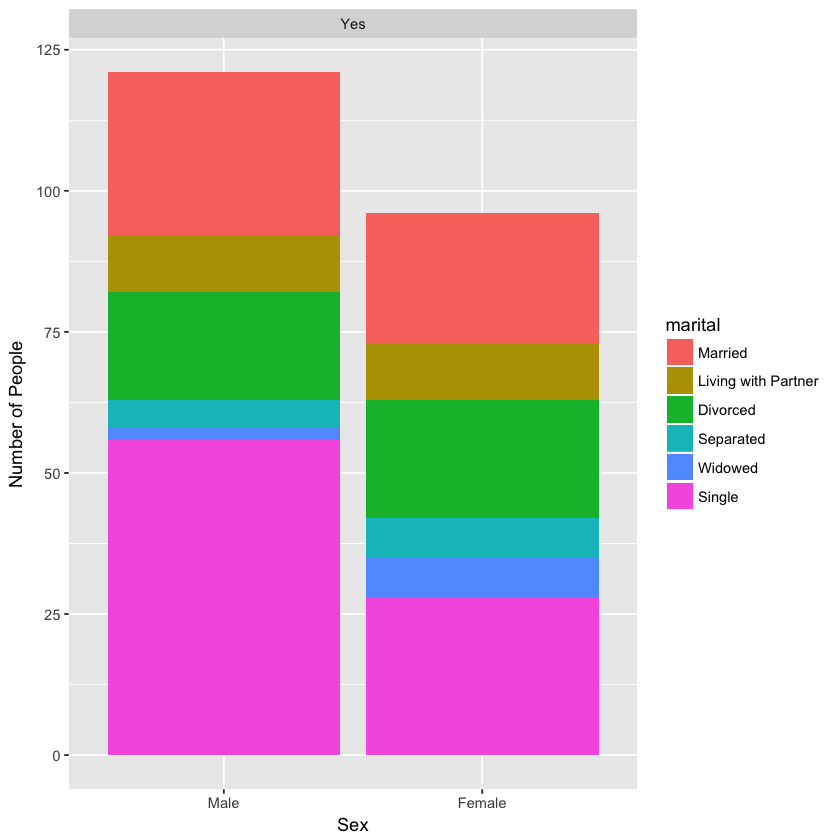

In [16]:
plot4_data <- data %>% filter(eminuse == "Yes", date1a == "Yes", marital != "Refused", marital != "Dont Know")
plot4_data %>% group_by(sex,date1a,marital) %>% summarize(num_people = n())
qplot(sex, data=plot4_data, geom="bar", facets = . ~ date1a, fill=marital, xlab = "Sex", ylab = "Number of People")

### Distribution of People by Sex and Income based on their Highest Level of Education Completed  
  
    
The income gap between the two genders can be clearly seen by comparison of income groups.  
While more women earn less than 20K. The numbers are clearly in favour of males for incomes of more than 100K.  
It is also seen that raise in income is directly proportional to the highest level of education completed.

sex,inc,num_people
Male,< 10K,54
Male,10K+,94
Male,20K+,86
Male,30K+,69
Male,40K+,82
Male,50K+,142
Male,75K+,98
Male,100K+,109
Male,150K+,100
Female,< 10K,94


sex,educ2,inc,num_people
Male,Less than High School,< 10K,4
Male,Less than High School,10K+,12
Male,Less than High School,20K+,3
Male,Less than High School,40K+,2
Male,Less than High School,50K+,2
Male,Less than High School,75K+,1
Male,Less than High School,150K+,2
Male,High School Incomplete,< 10K,9
Male,High School Incomplete,10K+,7
Male,High School Incomplete,20K+,6


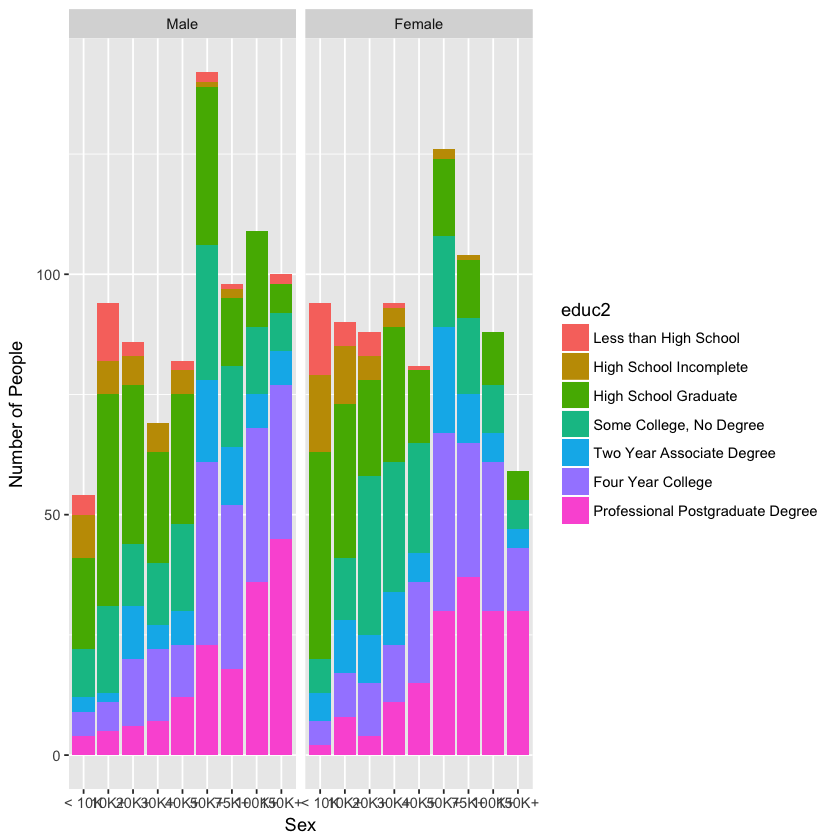

In [17]:
plot5_data <- data %>% filter(educ2 != "Dont Know", educ2 != "Refused", educ2 != "Some Postgraduate Degree", inc != "Refused", inc != "Dont Know")
plot5_data %>% group_by(sex,inc) %>% summarize(num_people = n())
plot5_data %>% group_by(sex,educ2,inc) %>% summarize(num_people = n())
qplot(inc, data=plot5_data, geom="bar", facets = . ~ sex, fill=educ2, xlab = "Sex", ylab = "Number of People")

### Distribution of People by Sex and Income based on their Marital Status

It is seen that for both genders, as the income range is increasing the number of married people in that range is increasing.

inc,marital,num_people
< 10K,Married,27
< 10K,Single,55
10K+,Married,52
10K+,Single,51
20K+,Married,61
20K+,Single,47
30K+,Married,74
30K+,Single,48
40K+,Married,85
40K+,Single,34


inc,marital,sex,num_people
< 10K,Married,Male,11
< 10K,Married,Female,16
< 10K,Single,Male,28
< 10K,Single,Female,27
10K+,Married,Male,30
10K+,Married,Female,22
10K+,Single,Male,31
10K+,Single,Female,20
20K+,Married,Male,31
20K+,Married,Female,30


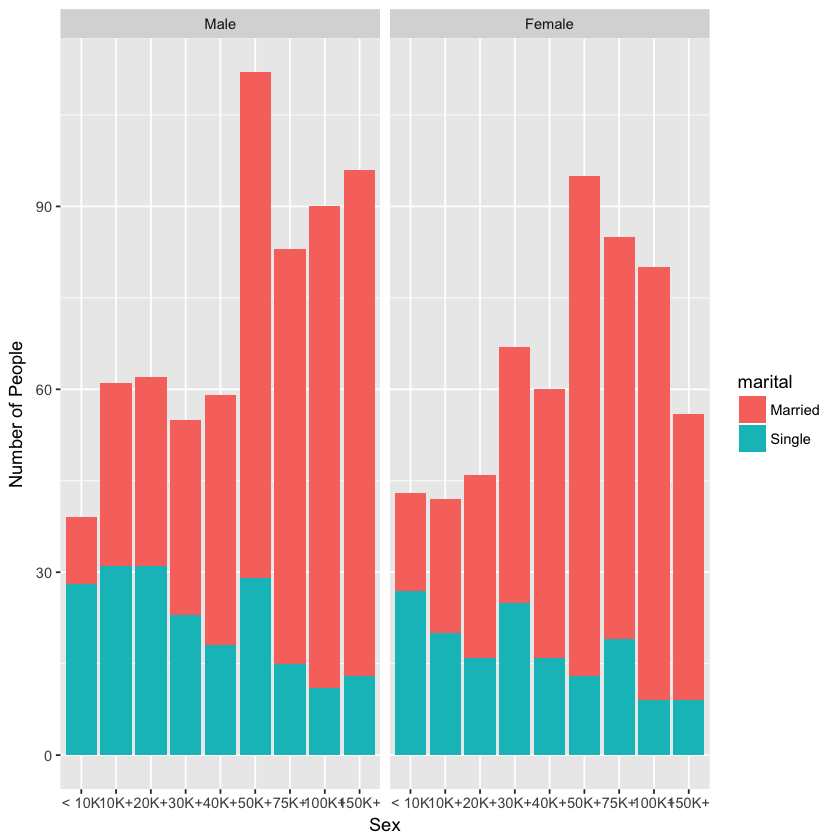

In [18]:
plot6_data <- data %>% filter(marital != "Divorced", marital != "Widowed", marital != "Refused", marital != "Dont Know", marital != "Living with Partner", marital != "Separated",inc != "Refused", inc != "Dont Know")
plot6_data %>% group_by(inc,marital) %>% summarize(num_people = n())
plot6_data %>% group_by(inc,marital,sex) %>% summarize(num_people = n())
qplot(inc, data=plot6_data, geom="bar", facets = . ~ sex, fill=marital, xlab = "Sex", ylab = "Number of People")